In [35]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [36]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [37]:
print(raw_dataset.isna().sum())

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


In [38]:
dataset = raw_dataset.dropna()

In [39]:
print(dataset.isna().sum())

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


In [40]:
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [41]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='', dtype="int")

/tmp/ipython-input-1184541096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})


In [42]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


In [43]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [44]:
import seaborn as sns

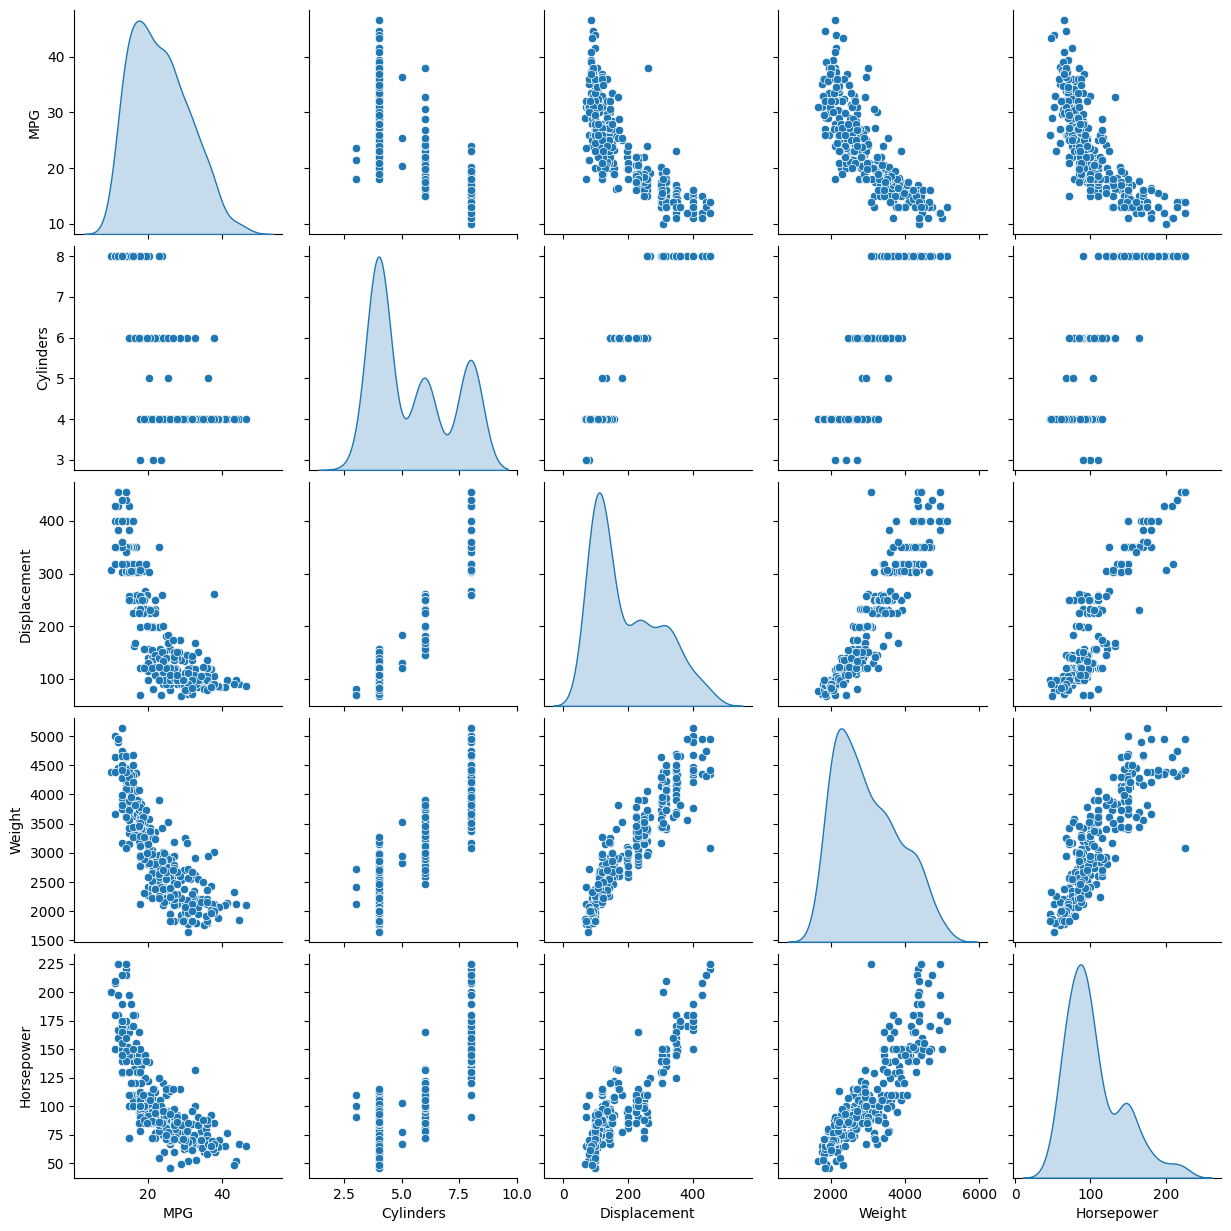

In [45]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight', 'Horsepower']], diag_kind='kde')

In [46]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [48]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [49]:
def plot_horsepower(x, y):
  plt.scatter(test_dataset['Horsepower'], test_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

In [50]:
train_dataset['Horsepower']

,Horsepower
146,75.0
282,88.0
69,160.0
378,63.0
331,67.0
...,...
281,85.0
229,180.0
150,93.0
145,61.0


In [51]:
train_labels

,MPG
146,28.0
282,22.3
69,12.0
378,38.0
331,33.8
...,...
281,19.8
229,16.0
150,26.0
145,32.0


In [52]:
train_subset = train_dataset['Horsepower'].to_numpy().reshape(-1, 1)

In [53]:
test_subset = test_dataset['Horsepower'].to_numpy().reshape(-1, 1)

In [54]:
def RSquared(dataset, labels, model):
  mean = labels.mean()
  RSS = 0
  for x_value, y_value in zip(dataset, labels):
    y = model.predict([x_value])
    RSS += (y_value - y) ** 2
  TSS = 0
  for y_value in labels:
    TSS += (mean - y_value) ** 2
  return 1 - RSS / TSS

In [55]:
reg = LinearRegression().fit(train_subset, train_labels)

In [56]:
x = np.linspace(0, 250, num=251).reshape(-1, 1)
y = reg.predict(x)

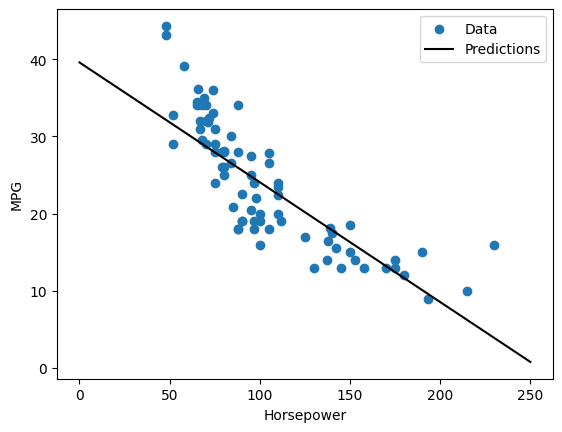

In [58]:
plot_horsepower(x, y)

In [59]:
y_predicted = reg.predict(test_subset)

In [60]:
RSquared(train_subset, train_labels, reg)

array([0.5845297])

In [61]:
poly = PolynomialFeatures(degree=2)

In [62]:
X_poly = poly.fit_transform(train_subset)

In [63]:
model = LinearRegression()

In [64]:
model.fit(X_poly, train_labels)

LinearRegression()

In [65]:
y = model.predict(poly.fit_transform(x))

In [66]:
train_labels

,MPG
146,28.0
282,22.3
69,12.0
378,38.0
331,33.8
...,...
281,19.8
229,16.0
150,26.0
145,32.0


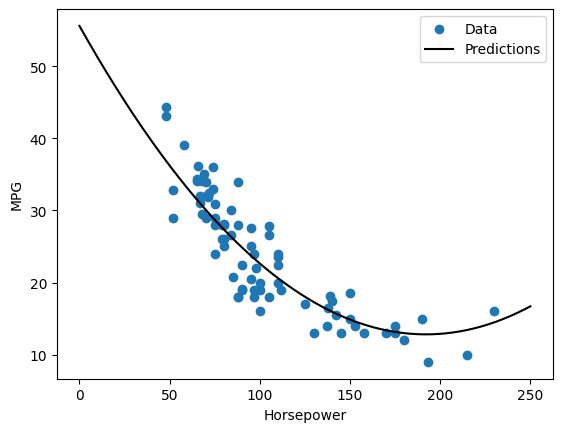

In [67]:
plot_horsepower(x, y)

In [68]:
X_test = poly.fit_transform(test_subset)

In [70]:
RSquared(X_test, test_labels, model)

array([0.79990323])